In [1]:
import sklearn
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns
from ellipse import confidence_ellipse, scatter_with_ellipse

sns.set(style='ticks')

/home/william/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv("./data/penguins_size.csv", delimiter=",")

In [3]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
data = data.dropna()
# lists for coloring categorically
_species = list(set(data.species))
_island = list(set(data.island))
_sex = list(set(data.sex))

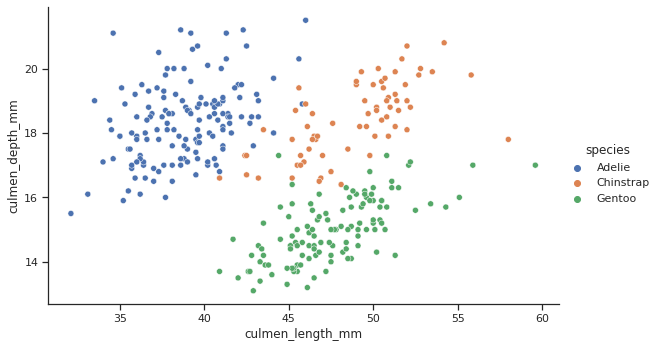

In [5]:
sns.relplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species', hue_order=_species, aspect=1.61)
plt.show()

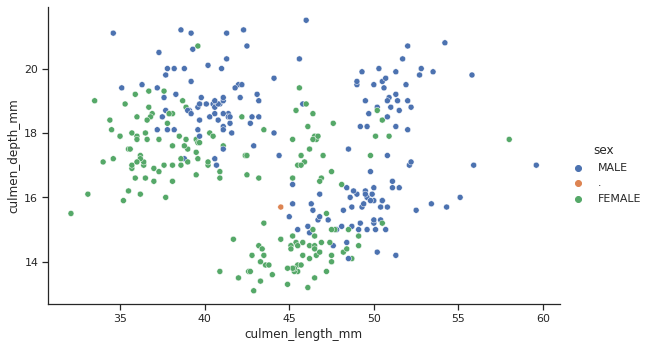

In [6]:
sns.relplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='sex', hue_order=_sex, aspect=1.61)
plt.show()

In [7]:
adelie_cov = data[data["species"] == "Adelie"][["culmen_length_mm","culmen_depth_mm"]].cov()
gentoo_cov = data[data["species"] == "Gentoo"][["culmen_length_mm","culmen_depth_mm"]].cov()
cstrap_cov = data[data["species"] == "Chinstrap"][["culmen_length_mm","culmen_depth_mm"]].cov()
male_cov = data[data["sex"] == "MALE"][["culmen_length_mm","culmen_depth_mm"]].cov()
female_cov = data[data["sex"] == "FEMALE"][["culmen_length_mm","culmen_depth_mm"]].cov()


In [12]:
adelie_df = data[data["species"] == "Adelie"][["culmen_length_mm","culmen_depth_mm"]]
gentoo_df = data[data["species"] == "Gentoo"][["culmen_length_mm","culmen_depth_mm"]]
cstrap_df = data[data["species"] == "Chinstrap"][["culmen_length_mm","culmen_depth_mm"]]

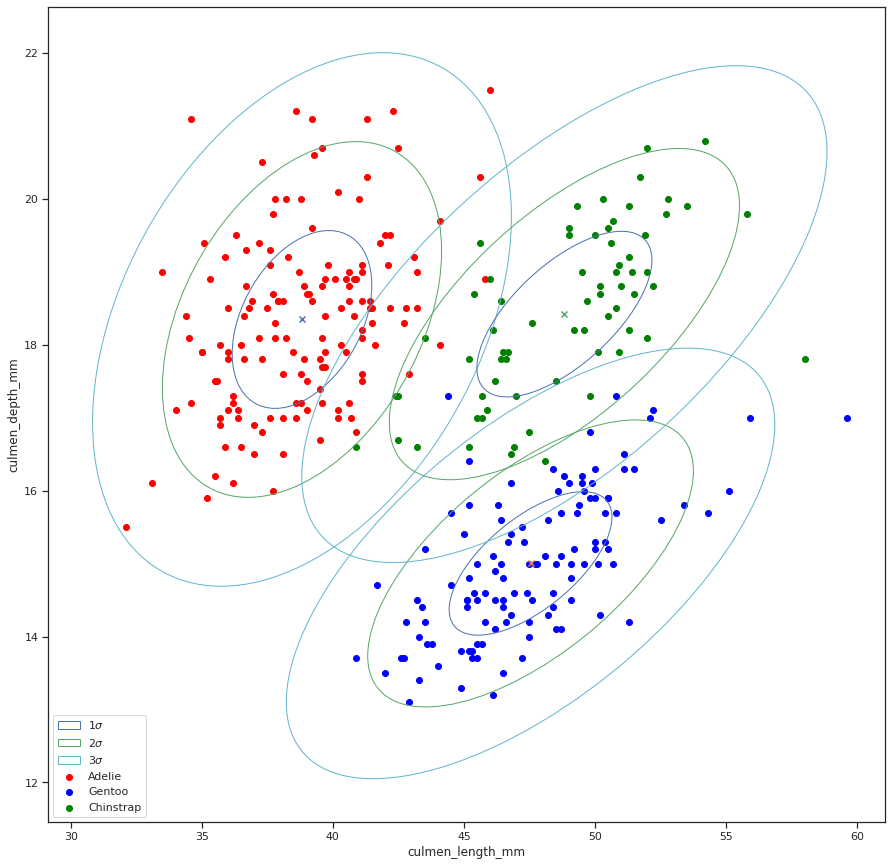

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_with_ellipse(adelie_df.culmen_length_mm, adelie_df.culmen_depth_mm, ax, 
                     p_label="Adelie", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="red",n_std=[1,2,3], c_std=['b','g','c'], set_label=True)
scatter_with_ellipse(gentoo_df.culmen_length_mm, gentoo_df.culmen_depth_mm, ax, 
                     p_label="Gentoo", color="blue", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
scatter_with_ellipse(cstrap_df.culmen_length_mm, cstrap_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap", color="green", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
ax.legend()
plt.show()